# Vysoká škola báňská - Technická univerzita Ostrava 
# Fakulta elektrotechniky a informatiky 
# Katedrta telekomunikační techniky
## Základy zpracování signálu - Samostatná práce č.1, zadání č. 3
##### Jméno: Jiří Černík (CER0484)
##### Datum: 13.3.2022
##### Forma studia: prezenční
##### Akademický rok. 2021/2022

### Mějme signál, definovaný 


$$x(t) =
     \begin{cases}
    0,&  t\in \langle \frac{-T_0}{2}, 0) \\
    p& t\in \langle 0, \frac {\tau}{2}) \\
    0& t\in \langle \frac {\tau}{2}, \frac{T_0}{2})
\end{cases}$$

Zvolte si libovolné reálné hodnoty $$t_0, \tau, T_0, p\ a\ q$$ tak, aby byla splněna podmínka $$0 < \tau < T_0,\ 0 < p < q,\ t_0 < \tau/2$$

### Úkol 1

Uveďte vámi zvolené hodnoty $t_0, \tau, T_0, p\ a\ q$ a zobrazte průběh signálu na základní periodě $T_0$.

$t_0 =1, \tau=4, T_0=5, p=2, q=4$

Symbolic pkg v3.1.1: Python communication link active, SymPy v1.9.


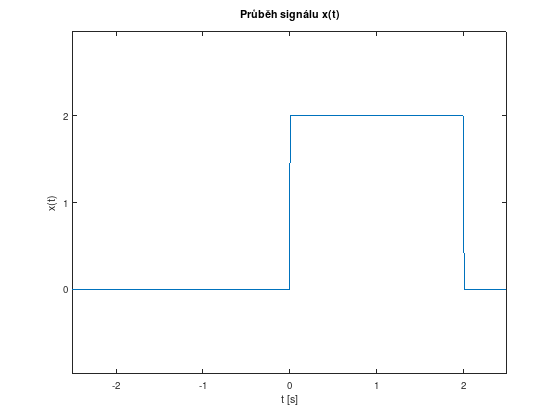

In [1]:
clear all; close all; clc; warning"off"
%Symbolické proměnné
pkg load symbolic
syms t real; 
syms t_0; 
syms tau; 
syms T_0; 
syms p; 
syms q; 
syms kk k k_a k_b integer; 
syms f_0; 
syms tau T_0 p positive real;

f_0 = 1/T_0; %frekvence zadaného dignálu

%Modelování zadaného dignálu
x_prubeh(t) = p;
x_interval(t) = heaviside(t - (0))- heaviside(t - tau/2);
x_sym(t) = x_prubeh * x_interval;

%Dosazené hodnoty
tau = 4; p = 2; T_0 = 5;q=4; t0=1;

%Vykreslení
x(t) = eval(x_sym(t));
ezplot(t, x(t), [-T_0/2 T_0/2]);xlabel('t [s]'); ylabel('x(t)'); title('Průběh signálu x(t)');

### Úkol 2


Analyzujte, zda signál splňuje Dirichletovy podmı́nky.

a) Zadaný signál splňuje první Dirichletovu podmínku, neboť je $ \textbf{periodický} $.

b) Zadaný signál splňuje druhou Dirichletovu podmínku, neboť je $ \textbf {spojitý} $.

c) Zadaný signál splňuje třetí Dirichletovu podmínku, neboť na zadaném intervalu $ \textbf { má konečný počet extrémů }$.

d) Zadaný signál splňuje čtvrtou Dirichletovu podmínku, neboť je $ \textbf { definován v krajních bodech zadaného intervalu } $.

#### Zadaný signál splňuje všechny Dirichletovy podmínky, můžeme dále pokračovat ve Fourierových řadách.

### Úkol 3

Vypočtěte obecně (bez dosazenı́ hodnot $t_0, \tau, T_0, p,\ q$) a uveďte vztah pro koeficienty Fourierovy
řady spektra signálu $ x(t) $. Uved’te co nejpodrobněji postup výpočtu.

##### Fourierova řada v reálném tvaru

$ x(t) =\sum_{k=0}^{\infty}  \widehat{a} |f_0 k|   \cos (2 \pi f_0 kt )+\sum_{k=1}^{\infty}  \widehat{b} |f_0 k|   \sin (2 \pi f_0 kt ) $

### Úlol 4

Dosaďte hodnoty $t_0, \tau, T_0, p,\ q$ a zobrazte spektrum signálu pro 2 zvolené hodnoty počtu harmo-
nických složek $ (> 10) $.

 #### Spektrum signálu $ x(t) $ pro 13 harmonických složek Furierovy řady

In [2]:
% Výpočet
T_0 = 5;
f_0 = 1/T_0;
c_0 = simplify(1/T_0*int(x(t), t, -T_0/2, T_0/2));
c_f0k = simplify(1/T_0*int(x(t)*exp(-1i*2*pi*f_0*k_a*t), t, -T_0/2, T_0/2))   
pocet_harmonickych_a = 13;
k_a = -pocet_harmonickych_a:pocet_harmonickych_a;
c_f0k = eval(c_f0k); c_f0k(k_a == 0) = eval(c_0);

c_f0k = (sym)

  ⎧        4/5           for kₐ = 0
  ⎪                                
  ⎪  ⎛      -4⋅ⅈ⋅π⋅kₐ ⎞            
  ⎪  ⎜      ──────────⎟            
  ⎨  ⎜          5     ⎟            
  ⎪ⅈ⋅⎝-1 + ℯ          ⎠            
  ⎪────────────────────  otherwise 
  ⎪        π⋅kₐ                    
  ⎩                                



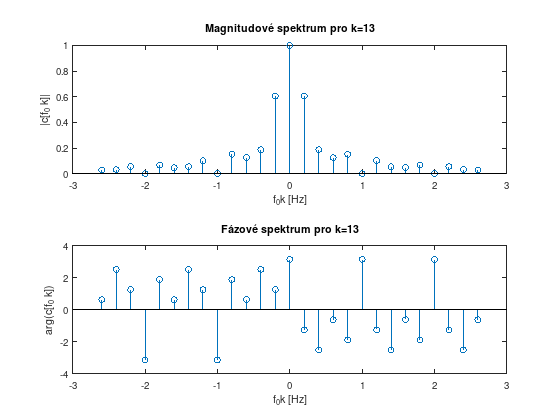

In [3]:
%Vykreslení spekter
figure
subplot(2, 1, 1); stem(f_0*k_a, abs(c_f0k)); xlabel('f_0k [Hz]'); ylabel('|c[f_0 k]|'); title('Magnitudové spektrum pro k=13');
subplot(2, 1, 2); stem(f_0*k_a, angle(c_f0k)); xlabel('f_0k [Hz]'); ylabel('arg(c[f_0 k])'); title('Fázové spektrum pro k=13');

 #### Spektrum signálu $ x(t) $ pro 15 harmonických složek Furierovy řady

In [4]:
% Výpočet
T_0 = 5;
f_0 = 1/T_0;
c_0 = simplify(1/T_0*int(x(t), t, -T_0/2, T_0/2));
c_f0k = simplify(1/T_0*int(x(t)*exp(-1i*2*pi*f_0*k_b*t), t, -T_0/2, T_0/2))   
pocet_harmonickych_b = 15;
k_b = -pocet_harmonickych_b:pocet_harmonickych_b;
c_f0k = eval(c_f0k); c_f0k(k_b == 0) = eval(c_0);

c_f0k = (sym)

  ⎧         4/5           for k_b = 0
  ⎪                                  
  ⎪  ⎛      -4⋅ⅈ⋅π⋅k_b ⎞             
  ⎪  ⎜      ───────────⎟             
  ⎨  ⎜           5     ⎟             
  ⎪ⅈ⋅⎝-1 + ℯ           ⎠             
  ⎪─────────────────────   otherwise 
  ⎪        π⋅k_b                     
  ⎩                                  



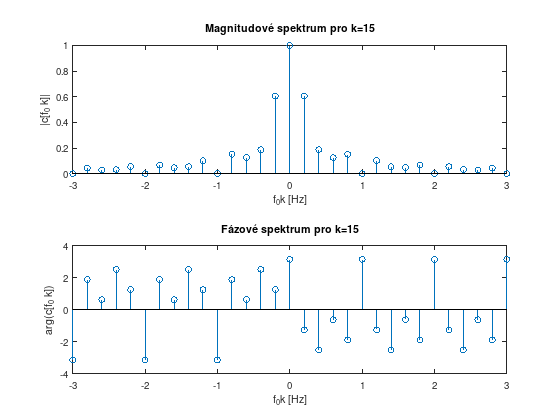

In [5]:
%Vykreslení spekter
figure
subplot(2, 1, 1); stem(f_0*k_b, abs(c_f0k)); xlabel('f_0k [Hz]'); ylabel('|c[f_0 k]|'); title('Magnitudové spektrum pro k=15');
subplot(2, 1, 2); stem(f_0*k_b, angle(c_f0k)); xlabel('f_0k [Hz]'); ylabel('arg(c[f_0 k])'); title('Fázové spektrum pro k=15');

### Úkol 5

Na intervalu $ -\frac{5}{2}T_0 < t < \frac{5}{2}T_0 $ proveďte syntézu signálu z Fourierovy řady pro 2 výše zvolené hodnoty počtu harmonických složek.

#### Syntéza signálu $ x(t) $ pro 13 harmonických složek

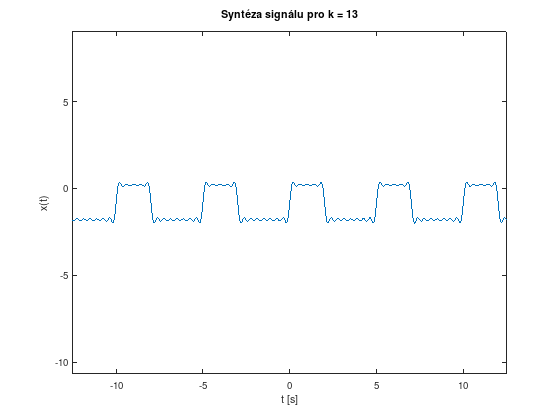

In [6]:
%Fourierova řada
c_0 = 1/T_0*int(x(t), t, -T_0/2, T_0/2);
c_f0k = 1/T_0*int(x(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2);   
pocet_harmonickych = 13;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k = eval(c_f0k); c_f0k(k == 0) = eval(c_0);

%Syntéza
x_synt(t) = sym(eval(c_0));
figure;
ezplot(t, x_synt(t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)');
for kk = 1:pocet_harmonickych
    x_synt(t) = x_synt(t) + ...
        c_f0k(k == -kk) * exp(1i*2*pi*f_0*(-kk)*t) + ...
        c_f0k(k == kk) * exp(1i*2*pi*f_0*kk*t);
        ezplot(t, x_synt, [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title(['Syntéza signálu pro k = ', num2str(kk)]); 
end


### Syntéza signálu $ x(t) $ pro 15 harmonických složek

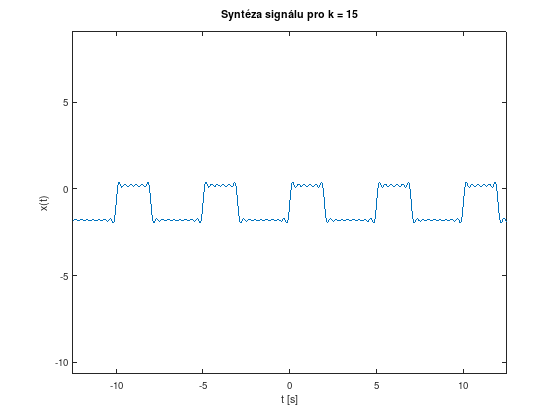

In [7]:
%Fourierova řada
clear c_0 c_f0k pocet_harmonickych k kk;
syms k intiger;
c_0 = 1/T_0*int(x(t), t, -T_0/2, T_0/2);
c_f0k = 1/T_0*int(x(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2);   
pocet_harmonickych = 15;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k = eval(c_f0k); c_f0k(k == 0) = eval(c_0);

%Syntéza
x_synt(t) = sym(eval(c_0));
figure;
ezplot(t, x_synt(t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)');
for kk = 1:pocet_harmonickych
    x_synt(t) = x_synt(t) + ...
        c_f0k(k == -kk) * exp(1i*2*pi*f_0*(-kk)*t) + ...
        c_f0k(k == kk) * exp(1i*2*pi*f_0*kk*t);
        ezplot(t, x_synt, [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title(['Syntéza signálu pro k = ', num2str(kk)]); 
end


### Úkol 6

Proveďte obecně (bez dosazenı́ hodnot $t_0, \tau, T_0, p,\ q$) rozklad signálu na sudou $ x_{S} (t) $ a lichou $ x_{L} (t) $ složku.

### Úkol 7

Dosaďte hodnoty $t_0, \tau, T_0, p,\ q$ a zobrazte sudou a lichou složku signálu a součet sudé a liché složky signálu.

#### Sudá složka

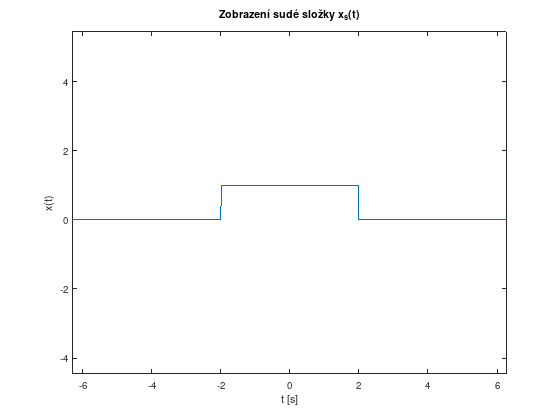

In [8]:
x_s(t) = (x(t)+x(-t))/2;
figure
ezplot(t, x_s(t)); xlabel('t [s]'); ylabel('x(t)'); title('Zobrazení sudé složky x_s(t)');

#### Lichá složka

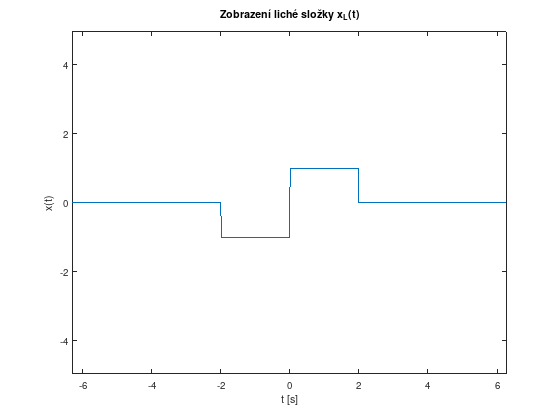

In [9]:
x_l(t) = (x(t)-x(-t))/2;
figure
ezplot(t, x_l(t)); xlabel('t [s]'); ylabel('x(t)'); title('Zobrazení liché složky x_L(t)');

#### Součet sudé a liché složky

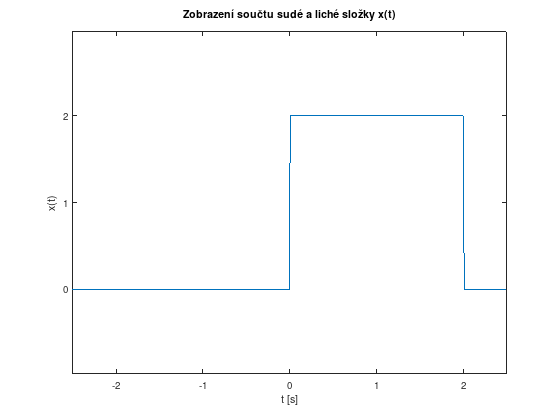

In [10]:
x_soucet(t) = x_s(t)+x_l(t);
figure
ezplot(t, x_soucet(t), [-T_0/2 T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title('Zobrazení součtu sudé a liché složky x(t)');

### Úkol 8

Vypočtěte obecně (bez dosazenı́ hodnot $t_0, \tau, T_0, p,\ q$) a vypište koeficienty Fourierovy řady spektra sudé a liché složky signálu $ x(t) $. Uveďte co nejpodrobněji postup výpočtu.

### Úkol 9

Dosaďte hodnoty $t_0, \tau, T_0, p,\ q$ a zobrazte spektrum sudé a liché složky signálu $ x(t)$ .

#### Spektrum sudé složky

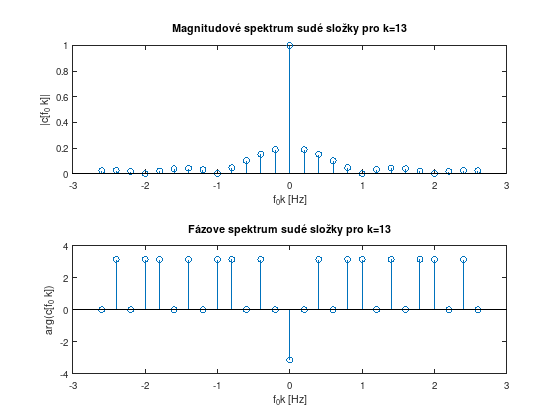

In [11]:
clear k pocet_harmonickych c_0_s c_f0k_s;
syms k intiger;
c_0_s = 1/T_0*int(x_s(t), t, -T_0/2, T_0/2);
c_f0k_s = 1/T_0*int(x_s(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2);     

pocet_harmonickych = 13;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k_s = eval(c_f0k_s); c_f0k_s(k == 0) = eval(c_0_s);
figure;
subplot(2, 1, 1); stem(f_0*k, abs(c_f0k_s)); xlabel('f_0k [Hz]'); ylabel('|c[f_0 k]|'); title('Magnitudové spektrum sudé složky pro k=13');
subplot(2, 1, 2); stem(f_0*k, angle(c_f0k_s)); xlabel('f_0k [Hz]'); ylabel('arg(c[f_0 k])'); title('Fázove spektrum sudé složky pro k=13');

#### Spektrum liché složky

Waiting..........


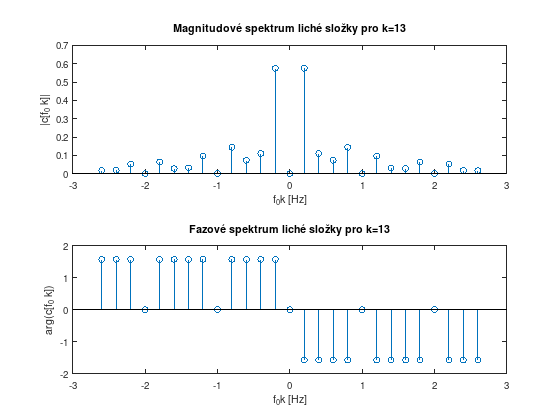

In [12]:
clear k pocet_harmonickych c_0_l c_f0k_l;
syms k intiger;
c_0_l = 1/T_0*int(x_l(t), t, -T_0/2, T_0/2);
c_f0k_l = 1/T_0*int(x_l(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2);     

pocet_harmonickych = 13;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k_l = eval(c_f0k_l); c_f0k_l(k == 0) = eval(c_0_l);
figure;
subplot(2, 1, 1); stem(f_0*k, abs(c_f0k_l)); xlabel('f_0k [Hz]'); ylabel('|c[f_0 k]|'); title('Magnitudové spektrum liché složky pro k=13');
subplot(2, 1, 2); stem(f_0*k, angle(c_f0k_l)); xlabel('f_0k [Hz]'); ylabel('arg(c[f_0 k])'); title('Fazové spektrum liché složky pro k=13');

### Úkol 10

Na intervalu $ -\frac{5}{2}T_0 < t < \frac{5}{2}T_0 $ proveďte syntézu sudé a liché složky signálu z Fourierovy řady pro 2 výše zvolené hodnoty počtu harmonických složek.

#### Syntéza sudé složky pro 13 harmonických složek

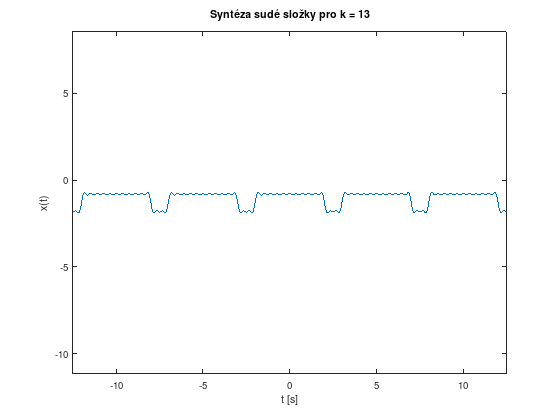

In [13]:
clear k pocet_harmonickych c_0_s c_f0k_s;
syms k intiger;
c_0_s = 1/T_0*int(x_s(t), t, -T_0/2, T_0/2);
c_f0k_s = 1/T_0*int(x_s(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2); 
pocet_harmonickych = 13;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k_s = eval(c_f0k_s); c_f0k_s(k == 0) = eval(c_0_s);
x_synt(t) = sym(eval(c_0_s));
figure;
ezplot(t, x_synt(t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)');
for kk = 1:pocet_harmonickych
    x_synt(t) = x_synt(t) + ...
       c_f0k_s(k == -kk) * exp(1i*2*pi*f_0*(-kk)*t) + ...
        c_f0k_s(k == kk) * exp(1i*2*pi*f_0*kk*t);
        ezplot(t, x_synt (t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title(['Syntéza sudé složky pro k = ', num2str(kk)]); drawnow; pause(0.1);
end

#### Syntéza liché složky pro 13 harmonických složek

Waiting..........
Waiting..........


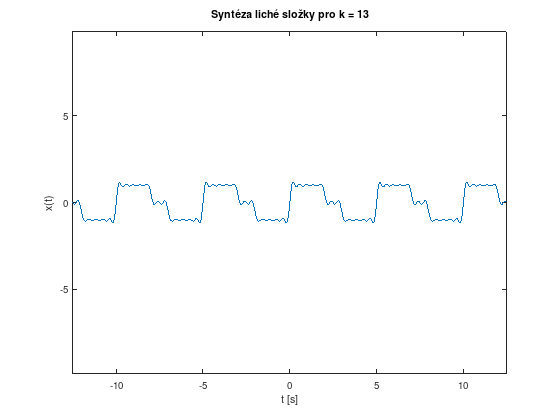

In [14]:
clear k pocet_harmonickych c_0_l c_f0k_l;
syms k intiger;
c_0_l = 1/T_0*int(x_l(t), t, -T_0/2, T_0/2);
c_f0k_l = 1/T_0*int(x_l(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2);     
pocet_harmonickych = 13;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k_l = eval(c_f0k_l); c_f0k_l(k == 0) = eval(c_0_l);
x_synt_l(t) = sym(eval(c_0_l));
figure;
ezplot(t, x_synt_l(t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)');
for kk = 1:pocet_harmonickych
    x_synt_l(t) = x_synt_l(t) + ...
        c_f0k_l(k == -kk) * exp(1i*2*pi*f_0*(-kk)*t) + ...
        c_f0k_l(k == kk) * exp(1i*2*pi*f_0*kk*t);
        ezplot(t, x_synt_l, [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title(['Syntéza liché složky pro k = ', num2str(kk)]); drawnow; pause(0.1);
end

#### Syntéza sudé složky pro 15 harmonických složek

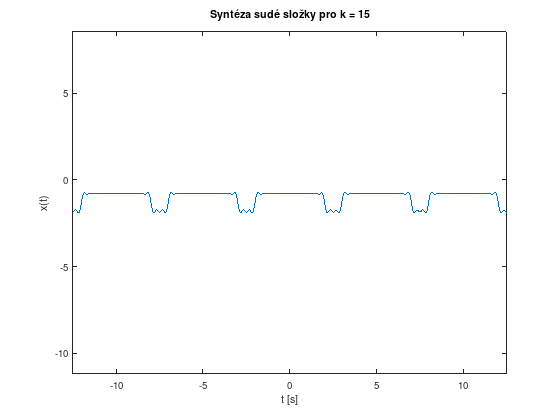

In [15]:
clear k pocet_harmonickych c_0_s c_f0k_s;
syms k intiger;
c_0_s = 1/T_0*int(x_s(t), t, -T_0/2, T_0/2);
c_f0k_s = 1/T_0*int(x_s(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2); 
pocet_harmonickych = 15;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k_s = eval(c_f0k_s); c_f0k_s(k == 0) = eval(c_0_s);
x_synt(t) = sym(eval(c_0_s));
figure;
ezplot(t, x_synt(t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)');
for kk = 1:pocet_harmonickych
    x_synt(t) = x_synt(t) + ...
       c_f0k_s(k == -kk) * exp(1i*2*pi*f_0*(-kk)*t) + ...
        c_f0k_s(k == kk) * exp(1i*2*pi*f_0*kk*t);
        ezplot(t, x_synt (t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title(['Syntéza sudé složky pro k = ', num2str(kk)]); drawnow; pause(0.1);
end

#### Syntéza liché složky pro 15 harmonických složek

Waiting..........
Waiting..........


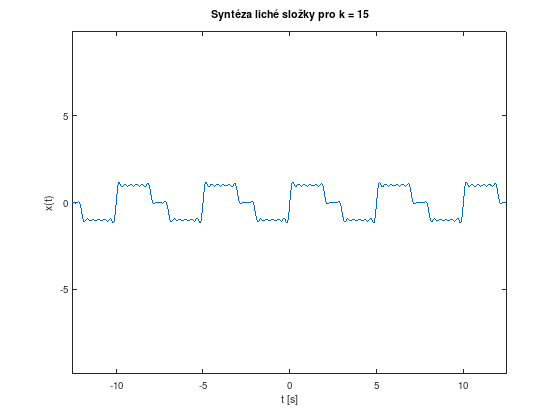

In [16]:
clear k pocet_harmonickych c_0_l c_f0k_l;
syms k intiger;
c_0_l = 1/T_0*int(x_l(t), t, -T_0/2, T_0/2);
c_f0k_l = 1/T_0*int(x_l(t)*exp(-1i*2*pi*f_0*k*t), t, -T_0/2, T_0/2);     
pocet_harmonickych = 15;
k = -pocet_harmonickych:pocet_harmonickych;
c_f0k_l = eval(c_f0k_l); c_f0k_l(k == 0) = eval(c_0_l);
x_synt_l(t) = sym(eval(c_0_l));
figure;
ezplot(t, x_synt_l(t), [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)');
for kk = 1:pocet_harmonickych
    x_synt_l(t) = x_synt_l(t) + ...
        c_f0k_l(k == -kk) * exp(1i*2*pi*f_0*(-kk)*t) + ...
        c_f0k_l(k == kk) * exp(1i*2*pi*f_0*kk*t);
        ezplot(t, x_synt_l, [-5*T_0/2 5*T_0/2]); xlabel('t [s]'); ylabel('x(t)'); title(['Syntéza liché složky pro k = ', num2str(kk)]); drawnow; pause(0.1);
end

### Zdroje

[1] Materiály ke stažení: Soubory pro studenty - ownCloud [online]. [cit. 2022-03-27]. Dostupné z: https://owncloud.cesnet.cz/index.php/s/YJKZcrXzSOpEP1k?path=%2F

[2] SKAPA, Jan. Zpracování signálů v komunikacích I a II [online]. Ostrava, 2022 [cit. 2022-03-27]. Dostupné z: https://owncloud.cesnet.cz/index.php/s/AAudTKwsECmibzN. VŠB-TUO

[3] Dirichletovy podmínky. Wikipedia: the free encyclopedia [online]. San Francisco (CA): Wikimedia Foundation, 2001- [cit. 2022-03-27]. Dostupné z: https://cs.wikipedia.org/wiki/Dirichletovy_podm%C3%ADnky